In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="white", context="talk")

# Polynomial Regression

In [41]:
class Dataset:
    def __init__(self, num_samples: int = 10):
        self.num_samples = num_samples

        self.xs = np.linspace(0, 1, num_samples)
        self.ts = np.sin(2 * np.pi * self.xs) + np.random.normal(0, 0.3, num_samples)

    def __len__(self):
        return self.num_samples

    def __call__(self):
        return self.xs, self.ts

In [70]:
x_train_10, t_train_10 = Dataset(num_samples=10)()
x_train_100, t_train_100 = Dataset(num_samples=100)()
x_test_100, t_test_100 = Dataset(num_samples=100)()

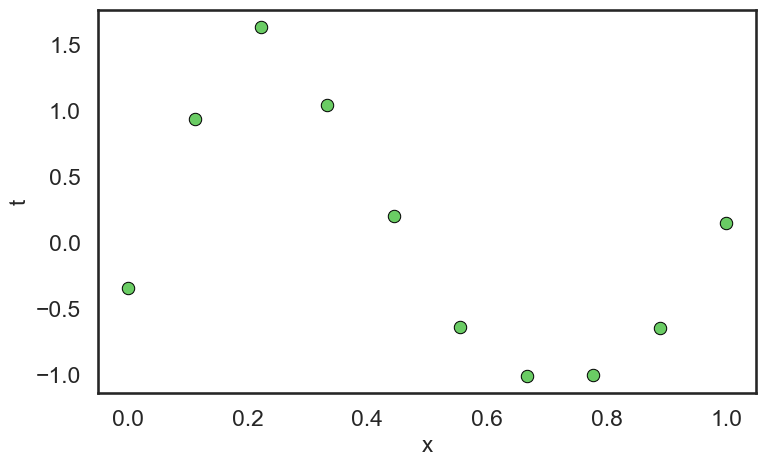

In [71]:
sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8, 5))

# Seaborn scatterplot without pandas
sns.scatterplot(x=x_train_10, y=t_train_10, s=80, color=sns.color_palette("muted")[2], edgecolor="black")

plt.xlabel("x", fontsize=16)
plt.ylabel("t", fontsize=16)

plt.tight_layout()
plt.show()

In [72]:
class LinearModel:
    def __init__(self, M=9, regularization=0.0):
        self.M = M
        self.regularization = regularization
        self.w = np.random.randn(M + 1)
        self.basis_funcs = [lambda x, n=n: x**n for n in range(M + 1)]

    def design_matrix(self, x):
        return np.array([[bf(xi) for bf in self.basis_funcs] for xi in x])

    def predict(self, x):
        Phi = self.design_matrix(x)
        return Phi @ self.w

    def solve(self, x, t):
        # We solve this according to the Sum of Squared Errors with Regularization
        Phi = self.design_matrix(x)

        if self.regularization > 0:
            R = self.regularization * np.eye(self.M + 1)
            R[0, 0] = 0.0  # 不正则化 bias
            Phi_aug = np.vstack([Phi, np.sqrt(R)])
            t_aug = np.concatenate([t, np.zeros(self.M + 1)])
            self.w, *_ = np.linalg.lstsq(Phi_aug, t_aug, rcond=None)
        else:
            self.w, *_ = np.linalg.lstsq(Phi, t, rcond=None)


In [74]:
model = LinearModel(M=9)
model.solve(x_train_10, t_train_10)

/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/2940443200.py:13: RuntimeWarning: divide by zero encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/2940443200.py:13: RuntimeWarning: overflow encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/2940443200.py:13: RuntimeWarning: invalid value encountered in matmul
  return Phi @ self.w


/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/3664307282.py:13: RuntimeWarning: divide by zero encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/3664307282.py:13: RuntimeWarning: overflow encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/3664307282.py:13: RuntimeWarning: invalid value encountered in matmul
  return Phi @ self.w


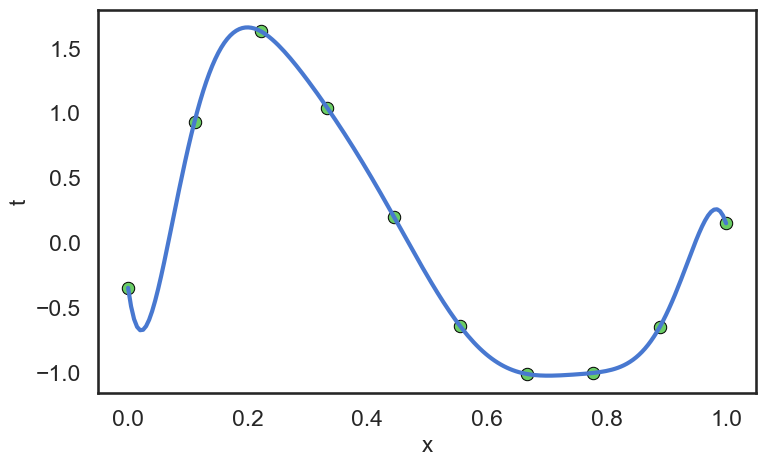

In [75]:
x_line = np.linspace(0, 1, 200)
y_line = model.predict(x_line)

plt.figure(figsize=(8, 5))
# Fitted polynomial curve
plt.plot(x_line, y_line, linewidth=3, color=sns.color_palette("muted")[0])

# Scatter points
sns.scatterplot(x=x_train_10, y=t_train_10, s=80, color=sns.color_palette("muted")[2], edgecolor="black")


plt.xlabel("x", fontsize=16)
plt.ylabel("t", fontsize=16)

plt.tight_layout()
plt.show()


/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/3664307282.py:13: RuntimeWarning: divide by zero encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/3664307282.py:13: RuntimeWarning: overflow encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/3664307282.py:13: RuntimeWarning: invalid value encountered in matmul
  return Phi @ self.w


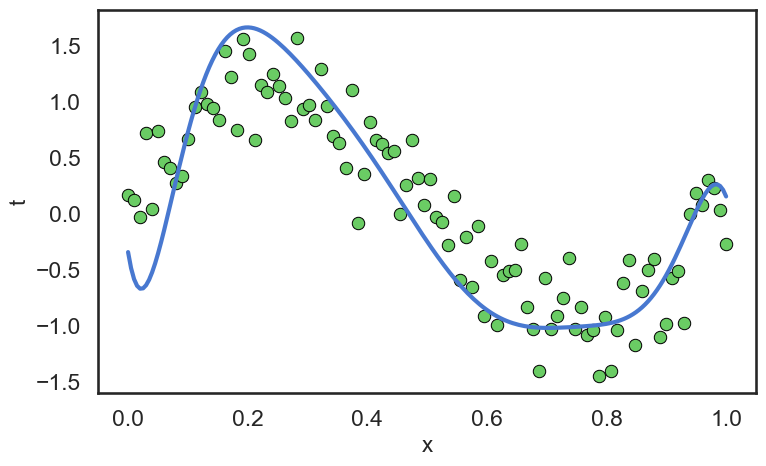

In [76]:
x_line = np.linspace(0, 1, 200)
y_line = model.predict(x_line)

plt.figure(figsize=(8, 5))
# Fitted polynomial curve
plt.plot(x_line, y_line, linewidth=3, color=sns.color_palette("muted")[0])

# Scatter points
sns.scatterplot(x=x_test_100, y=t_test_100, s=80, color=sns.color_palette("muted")[2], edgecolor="black")


plt.xlabel("x", fontsize=16)
plt.ylabel("t", fontsize=16)

plt.tight_layout()
plt.show()


## Error Functions 

In [50]:
class SumOfSquaresError:
    def __init__(self):
        pass

    def __call__(self, y: np.ndarray, t: np.ndarray) -> float:
        return 0.5 * np.sum((y - t) ** 2)


class RootMeanSquareError:
    def __init__(self):
        pass

    def __call__(self, y: np.ndarray, t: np.ndarray) -> float:
        return np.sqrt(np.mean((y - t) ** 2))

In [51]:
x_test, t_test = Dataset(num_samples=100)()
y_test = model.predict(x_test)

In [52]:
sum_of_squares_error = SumOfSquaresError()
root_mean_square_error = RootMeanSquareError()

In [53]:
sum_of_squares_error_value = sum_of_squares_error(y_test, t_test)
root_mean_square_error_value = root_mean_square_error(y_test, t_test)

In [54]:
sum_of_squares_error_value

np.float64(23.191749172732198)

In [55]:
root_mean_square_error_value


np.float64(0.6810543175508426)

In [ ]:
rmse_train_values = []
rmse_test_values = []
M_values = list(range(0, 10))

for M in M_values:
    model = LinearModel(M=M)
    model.solve(xs, ts)
    y_train = model.predict(xs)
    y_test = model.predict(x_test)
    rmse_test = root_mean_square_error(y_test, t_test)
    rmse_train = root_mean_square_error(y_train, ts)

    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)

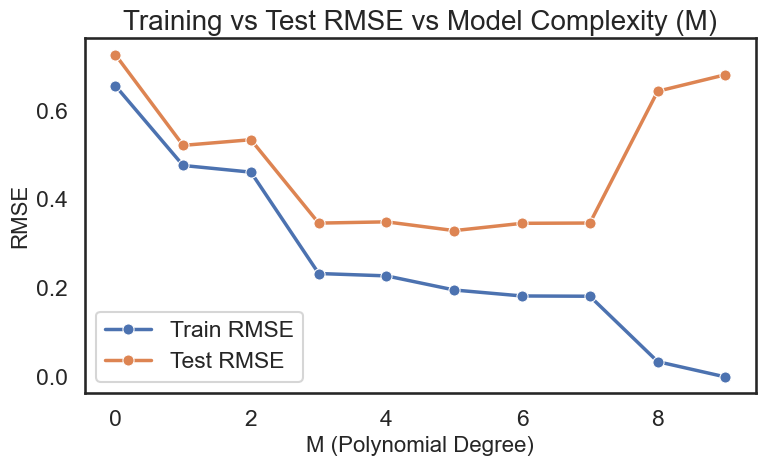

In [57]:
plt.figure(figsize=(8, 5))

# Train curve
sns.lineplot(
    x=M_values,
    y=rmse_train_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Train RMSE",
)

# Test curve
sns.lineplot(
    x=M_values,
    y=rmse_test_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Test RMSE",
)

plt.xlabel("M (Polynomial Degree)", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.title("Training vs Test RMSE vs Model Complexity (M)", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


In [58]:
train_set_100 = Dataset(num_samples=100)
x_100, t_100 = train_set_100()

In [59]:
model = LinearModel(M=9)
model.solve(x_100, t_100)


/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/2940443200.py:13: RuntimeWarning: divide by zero encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/2940443200.py:13: RuntimeWarning: overflow encountered in matmul
  return Phi @ self.w
/var/folders/w5/93bd91tj12j0_9hymwwnh3ym0000gn/T/ipykernel_17442/2940443200.py:13: RuntimeWarning: invalid value encountered in matmul
  return Phi @ self.w


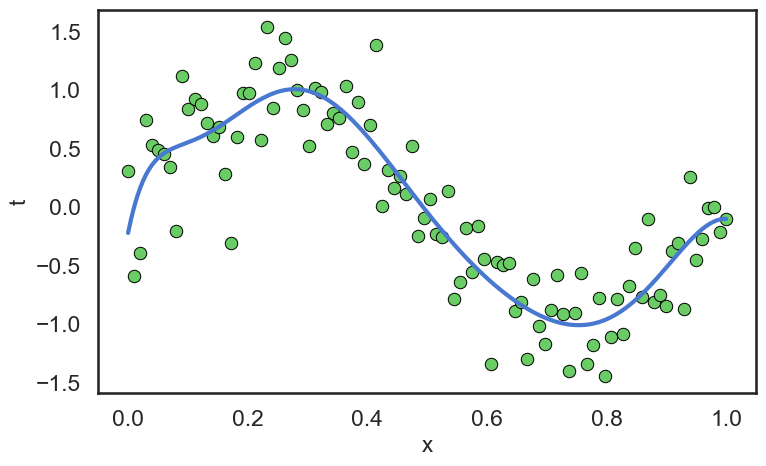

In [60]:
x_line = np.linspace(0, 1, 200)
y_line = model.predict(x_line)

sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8, 5))

# Fitted polynomial curve
plt.plot(x_line, y_line, linewidth=3, color=sns.color_palette("muted")[0])

# Scatter points
sns.scatterplot(x=x_100, y=t_100, s=80, color=sns.color_palette("muted")[2], edgecolor="black")


plt.xlabel("x", fontsize=16)
plt.ylabel("t", fontsize=16)

plt.tight_layout()
plt.show()

In [61]:
rmse_train_values = []
rmse_test_values = []
M_values = list(range(0, 10))

for M in M_values:
    model = LinearModel(M=M)
    model.solve(x_100, t_100)
    y_train = model.predict(x_100)
    y_test = model.predict(x_test)
    rmse_test = root_mean_square_error(y_test, t_test)
    rmse_train = root_mean_square_error(y_train, t_100)

    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)

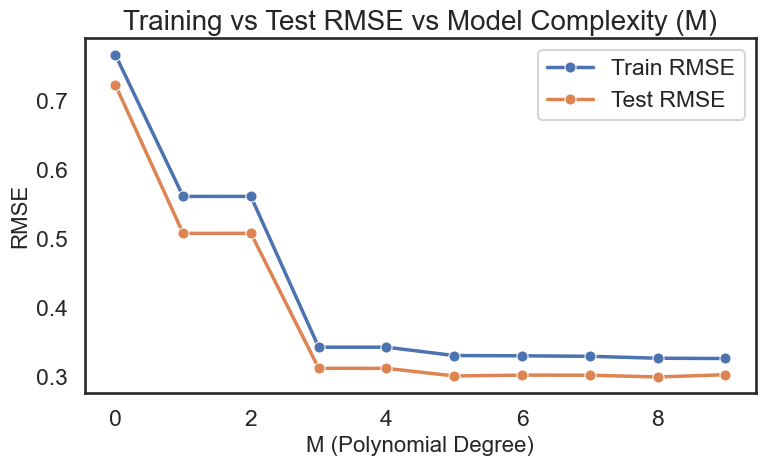

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8, 5))

# Train curve
sns.lineplot(
    x=M_values,
    y=rmse_train_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Train RMSE",
)

# Test curve
sns.lineplot(
    x=M_values,
    y=rmse_test_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Test RMSE",
)

plt.xlabel("M (Polynomial Degree)", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.title("Training vs Test RMSE vs Model Complexity (M)", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


In [63]:
model_regularized = LinearModel(M=9, regularization=0.001)
model_regularized.solve(x, t)

NameError: name 'x' is not defined

In [64]:
rmse_train_values = []
rmse_test_values = []
M_values = list(range(0, 10))

for M in M_values:
    model = LinearModel(M=M, regularization=0.001)
    model.solve(x, t)
    y_train = model.predict(x)
    y_test = model.predict(x_test)
    rmse_test = root_mean_square_error(y_test, t_test)
    rmse_train = root_mean_square_error(y_train, t)

    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)


NameError: name 'x' is not defined

KeyError: 'y'

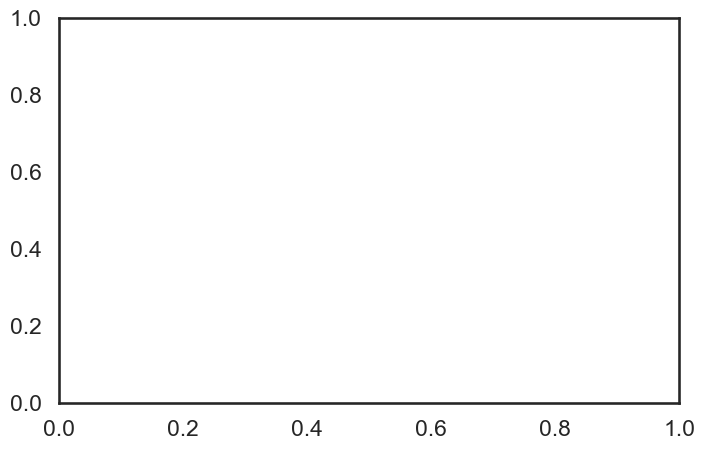

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8, 5))

# Train curve
sns.lineplot(
    x=M_values,
    y=rmse_train_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Train RMSE",
)

# Test curve
sns.lineplot(
    x=M_values,
    y=rmse_test_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Test RMSE",
)

plt.xlabel("M (Polynomial Degree)", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.title("Training vs Test RMSE vs Model Complexity (M)", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


In [69]:
rmse_train_values = []
rmse_test_values = []
lambda_values = [0.000001, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for lambda_ in lambda_values:
    model = LinearModel(M=9, regularization=lambda_)
    model.solve(xs, ts)
    y_train = model.predict(xs)
    y_test = model.predict(x_test)
    rmse_test = root_mean_square_error(y_test, t_test)
    rmse_train = root_mean_square_error(y_train, ts)

    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)


KeyError: 'y'

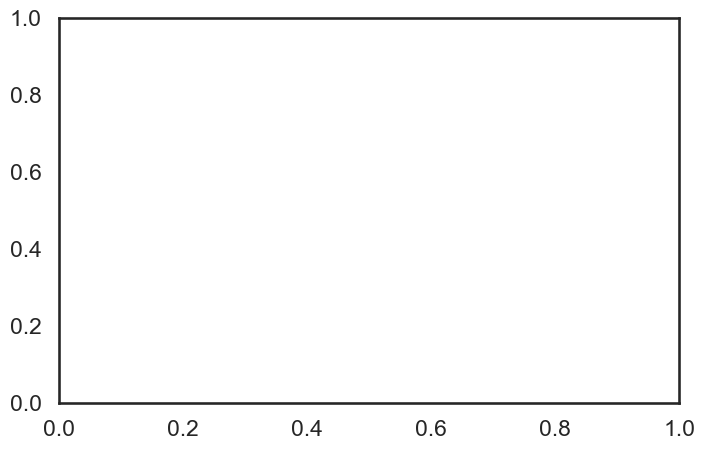

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8, 5))

# Train curve
sns.lineplot(
    x=[np.log2(lam) for lam in lambda_values],
    y=rmse_train_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Train RMSE",
)

# Test curve
sns.lineplot(
    x=[np.log2(lam) for lam in lambda_values],
    y=rmse_test_values,
    marker="o",
    markersize=8,
    linewidth=2.5,
    label="Test RMSE",
)

plt.xlabel("M (Polynomial Degree)", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.title("Training vs Test RMSE vs Model Complexity (M)", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()
